In [272]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

#setting to make number easier to read on display
pd.options.display.float_format = "{:20.2f}".format
# show all columns on output
pd.set_option("display.max_columns",999)
import warnings
warnings.filterwarnings("ignore")

In [273]:
df = pd.read_csv(r"E:\Internship Projects DH C\Customer Segmentation Using Unsupervised Learning\Mall_Customers (1).csv")

In [274]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [275]:
df.shape

(200, 5)

In [276]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [277]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


<Figure size 800x600 with 0 Axes>

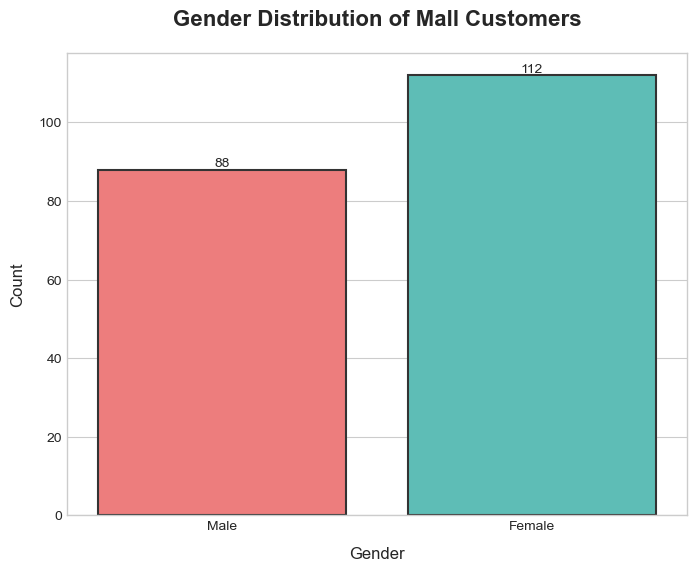

In [278]:
import seaborn as sns
import matplotlib.pyplot as plt


palette = ["#FF6B6B", "#4ECDC4"]  

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Gender', data=df, palette=palette, edgecolor=".2", linewidth=1.5)


plt.title("Gender Distribution of Mall Customers", fontsize=16, pad=20, fontweight='bold')
plt.xlabel("Gender", fontsize=12, labelpad=10)
plt.ylabel("Count", fontsize=12, labelpad=10)

for i in ax.containers:
    ax.bar_label(i)
plt.show()

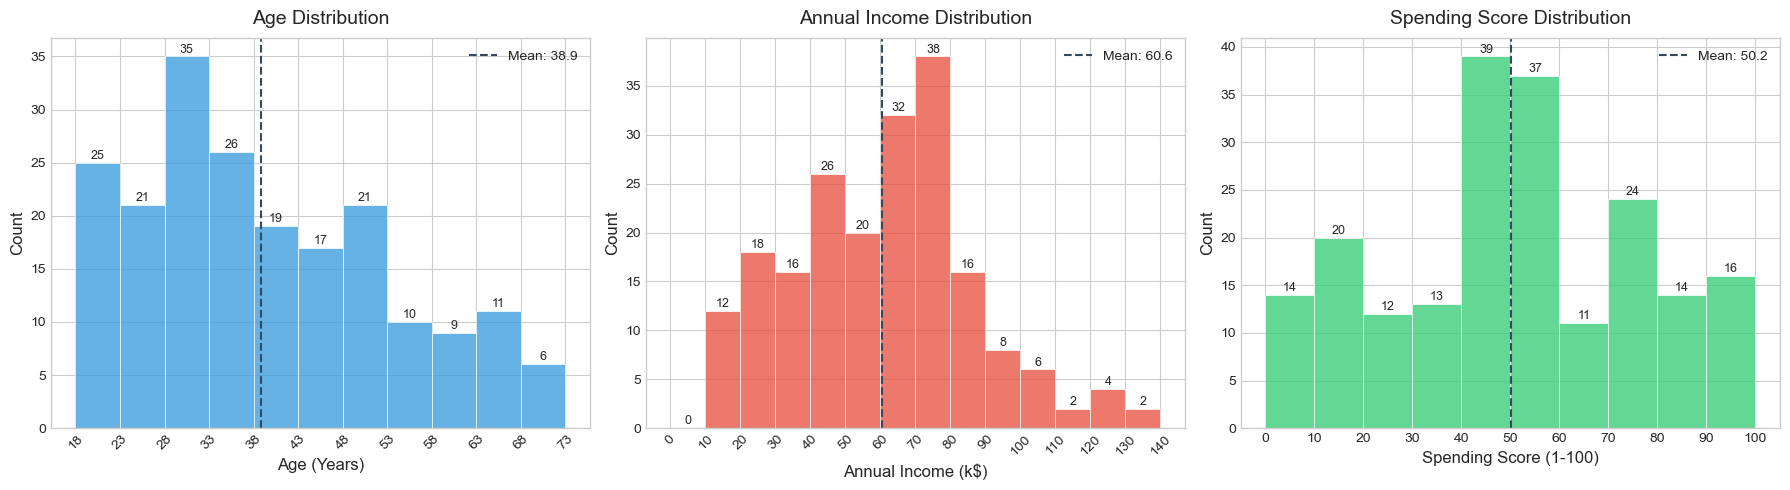

In [279]:
colors = ["#3498db", "#e74c3c", "#2ecc71"]
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
age_bins = np.arange(df['Age'].min(), df['Age'].max() + 5, 5)
ax = sns.histplot(df['Age'], bins=age_bins, color=colors[0], edgecolor='white', linewidth=0.5)
plt.title('Age Distribution', fontsize=14, pad=10)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(age_bins, rotation=45)
plt.axvline(df['Age'].mean(), color='#34495e', linestyle='--', label=f'Mean: {df["Age"].mean():.1f}')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=9)
plt.legend()

plt.subplot(1, 3, 2)
income_bins = np.arange(0, df['Annual Income (k$)'].max() + 10, 10)
ax = sns.histplot(df['Annual Income (k$)'], bins=income_bins, color=colors[1], edgecolor='white', linewidth=0.5)
plt.title('Annual Income Distribution', fontsize=14, pad=10)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(income_bins, rotation=45)
plt.axvline(df['Annual Income (k$)'].mean(), color='#34495e', linestyle='--', label=f'Mean: {df["Annual Income (k$)"].mean():.1f}')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=9)
plt.legend()

plt.subplot(1, 3, 3)
score_bins = np.arange(0, 110, 10)
ax = sns.histplot(df['Spending Score (1-100)'], bins=score_bins, color=colors[2], edgecolor='white', linewidth=0.5)
plt.title('Spending Score Distribution', fontsize=14, pad=10)
plt.xlabel('Spending Score (1-100)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(score_bins)
plt.axvline(df['Spending Score (1-100)'].mean(), color='#34495e', linestyle='--', label=f'Mean: {df["Spending Score (1-100)"].mean():.1f}')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=9)
plt.legend()

plt.tight_layout()
plt.show()


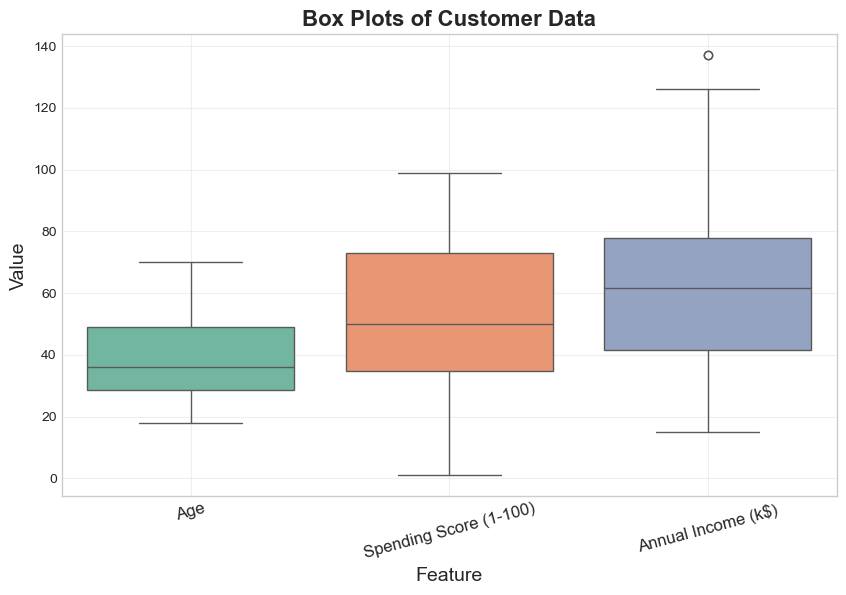

In [280]:
df_melted = df.melt(value_vars=["Age", "Spending Score (1-100)", "Annual Income (k$)"],
                    var_name="Feature", value_name="Value")

plt.figure(figsize=(10,6))
sns.boxplot(x="Feature", y="Value", data=df_melted, palette="Set2")

plt.title("Box Plots of Customer Data", fontsize=16, fontweight="bold")
plt.ylabel("Value", fontsize=14)
plt.xlabel("Feature", fontsize=14)
plt.xticks(rotation=15, fontsize=12)
plt.grid(alpha=0.3)
plt.show()

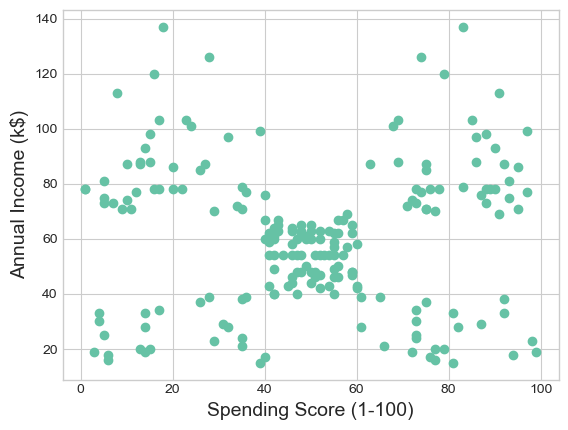

In [281]:
plt.scatter(x = df["Spending Score (1-100)"], y = df["Annual Income (k$)"])
plt.xlabel("Spending Score (1-100)",fontsize = 14)
plt.ylabel("Annual Income (k$)",fontsize = 14)
plt.show()

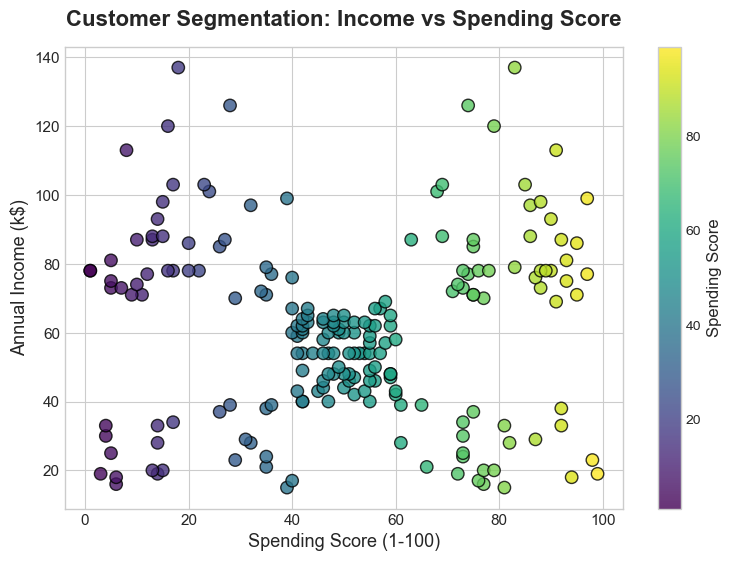

In [282]:
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("Set2")

# Plot
plt.figure(figsize=(9,6))
plt.scatter(
    x=df["Spending Score (1-100)"], 
    y=df["Annual Income (k$)"],
    c=df["Spending Score (1-100)"], 
    cmap="viridis",                  
    s=80,                            
    edgecolor="black",               
    alpha=0.8                       
)

# Titles & labels
plt.title("Customer Segmentation: Income vs Spending Score", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Spending Score (1-100)", fontsize=13)
plt.ylabel("Annual Income (k$)", fontsize=13)

# Colorbar for spending score
cbar = plt.colorbar()
cbar.set_label("Spending Score", fontsize=12)

# Clean up ticks
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Show
plt.show()

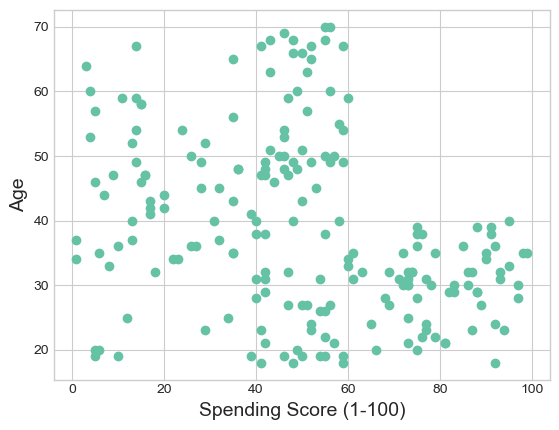

In [283]:
plt.scatter(x = df["Spending Score (1-100)"], y = df["Age"])
plt.xlabel("Spending Score (1-100)",fontsize = 14)
plt.ylabel("Age",fontsize = 14)
plt.show()

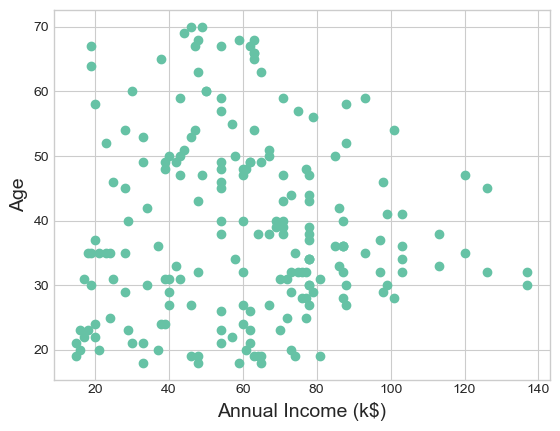

In [284]:
plt.scatter(x = df["Annual Income (k$)"], y = df["Age"])
plt.xlabel("Annual Income (k$)",fontsize = 14)
plt.ylabel("Age",fontsize = 14)
plt.show()

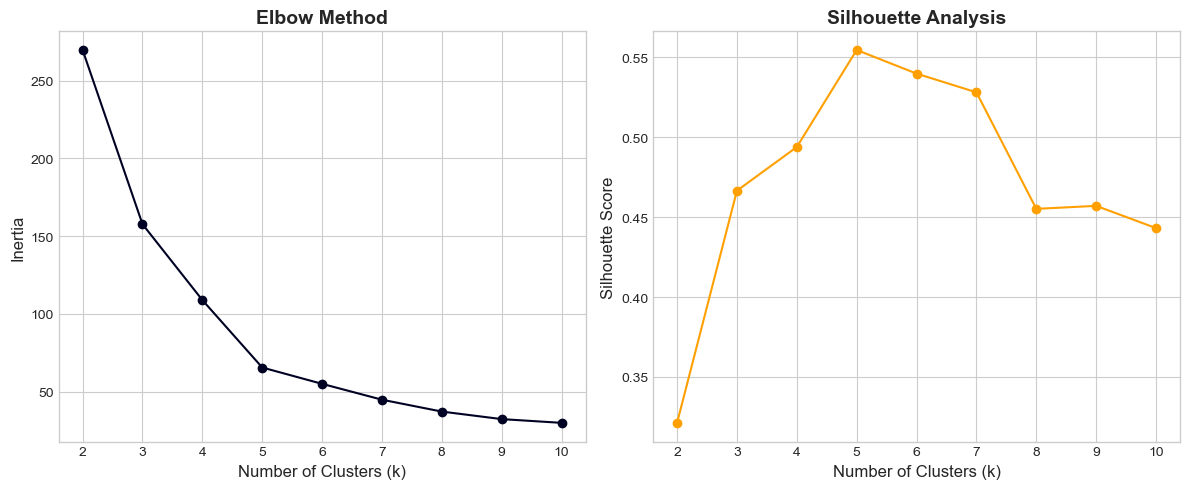

In [285]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertias = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, inertias, "o-", color="#000223")
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
plt.title("Elbow Method", fontsize=14, fontweight="bold")

plt.subplot(1,2,2)
plt.plot(K, silhouette_scores, "o-", color="#FFA000")
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.title("Silhouette Analysis", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

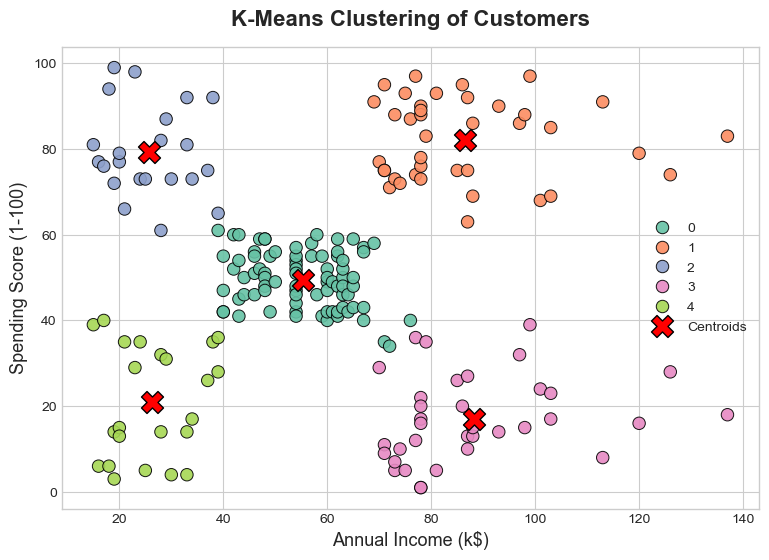

In [286]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Cluster centers (inverse transform back to original units)
centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Plot in original units
plt.figure(figsize=(9,6))
sns.scatterplot(
    x="Annual Income (k$)", 
    y="Spending Score (1-100)", 
    hue="Cluster", 
    data=df, 
    palette="Set2", 
    s=80, 
    edgecolor="black", 
    alpha=0.9
)

plt.scatter(
    centers[:,0], centers[:,1], 
    c="red", s=250, marker="X", 
    edgecolor="black", label="Centroids"
)

plt.title("K-Means Clustering of Customers", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Annual Income (k$)", fontsize=13)
plt.ylabel("Spending Score (1-100)", fontsize=13)
plt.legend()
plt.show()

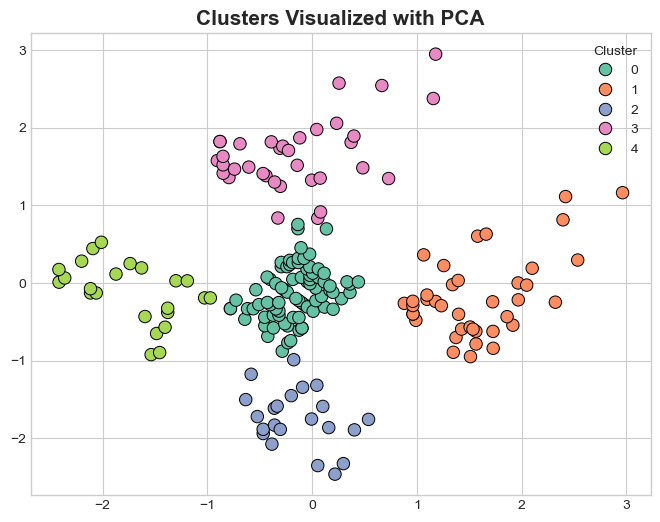

In [287]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["Cluster"], palette="Set2", s=80, edgecolor="black")
plt.title("Clusters Visualized with PCA", fontsize=15, fontweight="bold")
plt.show()

In [288]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [289]:
df["Cluster"].unique()

array([4, 2, 0, 1, 3], dtype=int32)

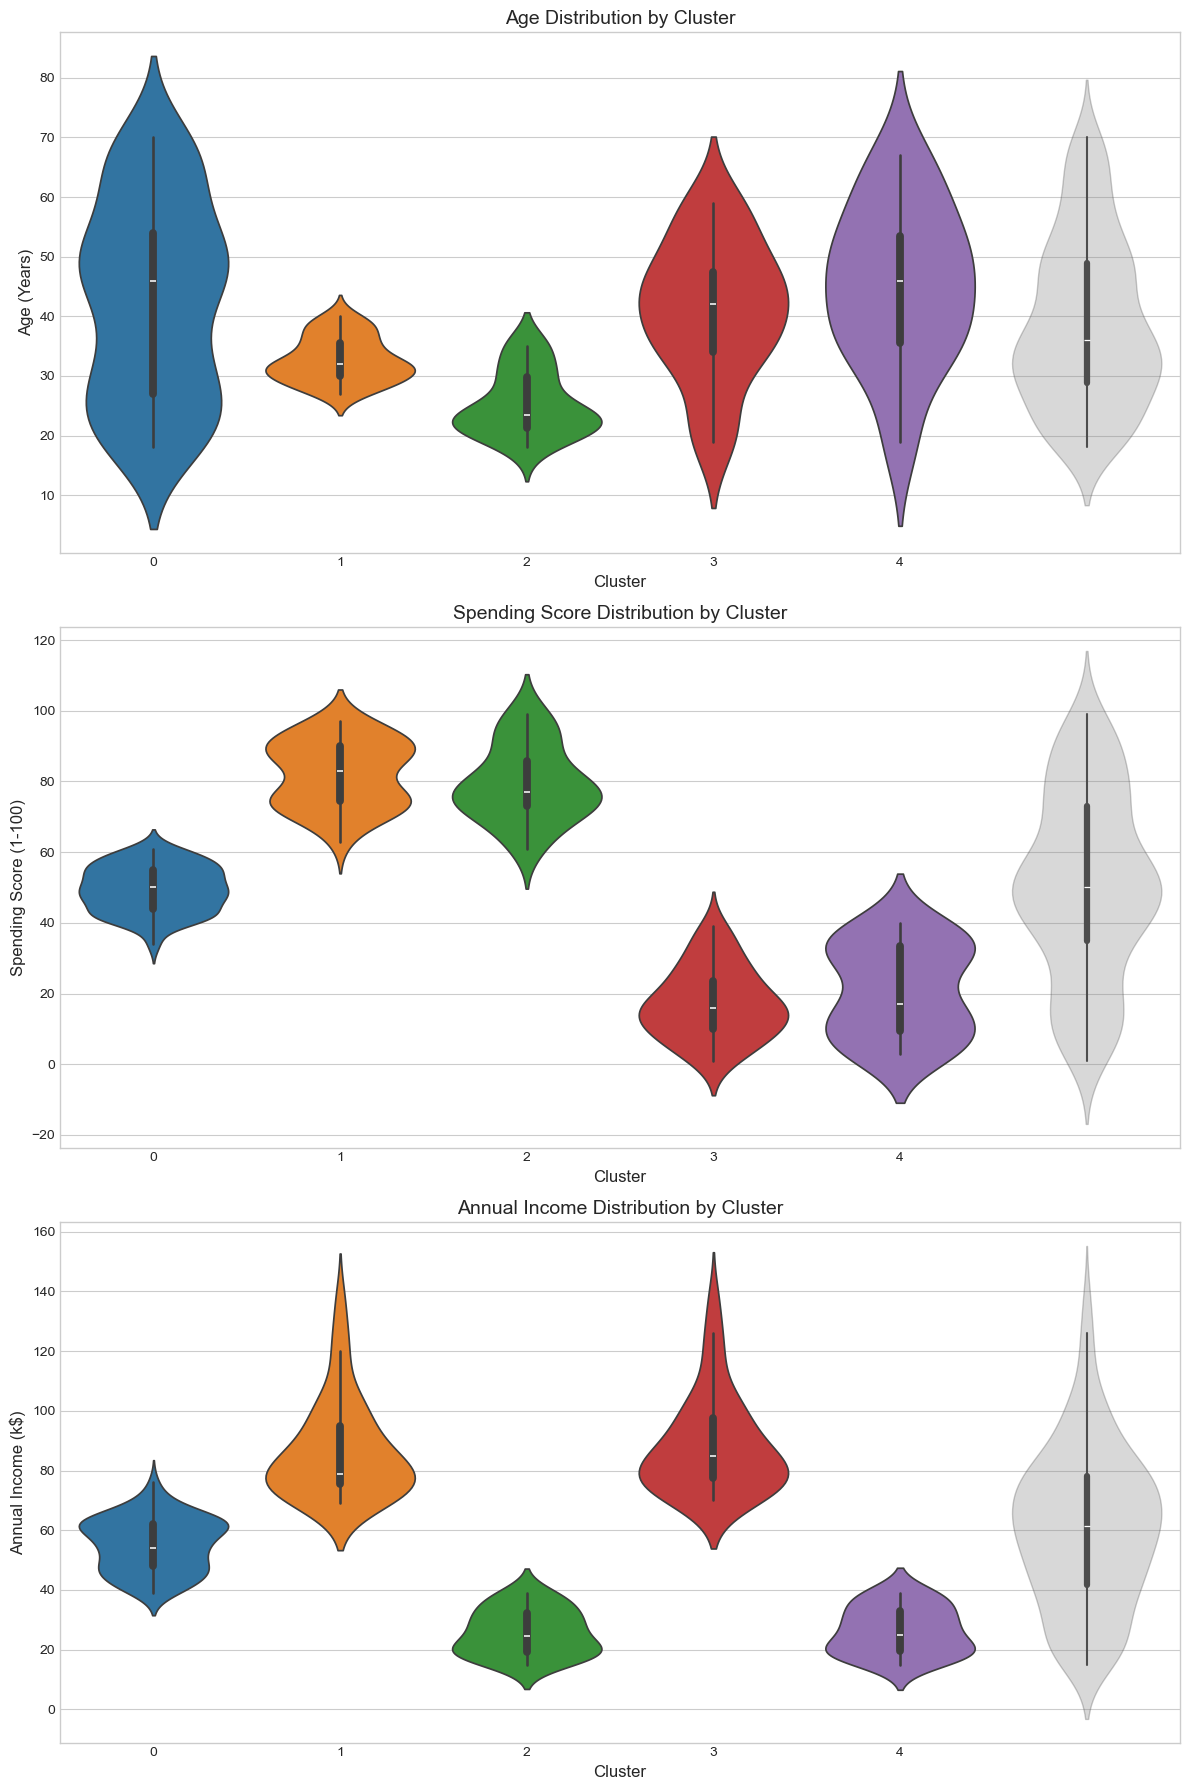

In [290]:
clusters_color = {
    0: "#1f77b4",  # Blue
    1: "#ff7f0e",  # Orange
    2: "#2ca02c",  # Green
    3: "#d62728",  # Red
    4: "#9467bd"   # Purple (added for 5 clusters)
}

plt.figure(figsize=(12, 18))


plt.subplot(3, 1, 1)
sns.violinplot(x=df['Cluster'], y=df['Age'], palette=clusters_color, hue=df["Cluster"])
sns.violinplot(y=df['Age'], color='gray', linewidth=1.0, alpha=0.3)
plt.title('Age Distribution by Cluster', fontsize=14)
plt.ylabel('Age (Years)', fontsize=12)
plt.xlabel('Cluster', fontsize=12)
plt.legend().remove()


plt.subplot(3, 1, 2)
sns.violinplot(x=df['Cluster'], y=df['Spending Score (1-100)'], palette=clusters_color, hue=df["Cluster"])
sns.violinplot(y=df['Spending Score (1-100)'], color='gray', linewidth=1.0, alpha=0.3)
plt.title('Spending Score Distribution by Cluster', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.xlabel('Cluster', fontsize=12)
plt.legend().remove()


plt.subplot(3, 1, 3)
sns.violinplot(x=df['Cluster'], y=df['Annual Income (k$)'], palette=clusters_color, hue=df["Cluster"])
sns.violinplot(y=df['Annual Income (k$)'], color='gray', linewidth=1.0, alpha=0.3)
plt.title('Annual Income Distribution by Cluster', fontsize=14)
plt.ylabel('Annual Income (k$)', fontsize=12)
plt.xlabel('Cluster', fontsize=12)
plt.legend().remove()

plt.tight_layout()
plt.show()

# Customer Segmentation: Cluster Insights

---

## Cluster 0 (Blue): **The "Average Joes"**
- **Rationale**:  
  - Moderate range of spending scores and annual income.  
  - Wide distribution of ages.  
  - No extreme values — represents a balanced, general group.  

- **Action**:  
  - Use **broad-based marketing campaigns**.  
  - Introduce **loyalty programs**.  
  - Highlight **new products** to maintain engagement.  

---

## Cluster 1 (Orange): **The "High Spenders"**
- **Rationale**:  
  - Very high spending score.  
  - Moderate-to-high annual income.  
  - Relatively young age distribution.  
  - Clearly valuable, high-spending customers.  

- **Action**:  
  - Provide **exclusive offers & VIP benefits**.  
  - Launch a **premium loyalty program**.  
  - Strengthen **relationship management** to retain value.  

---

## Cluster 2 (Green): **The "Budget Shoppers"**
- **Rationale**:  
  - High spending score despite **low annual income**.  
  - Mostly younger age group.  
  - Likely **savvy deal-seekers** maximizing purchases.  

- **Action**:  
  - Offer **frequent discounts & flash sales**.  
  - Emphasize **value-for-money bundles**.  
  - Use **time-limited promotions** to trigger impulse buys.  

---

## Cluster 3 (Red): **The "Big Earners"**
- **Rationale**:  
  - Very high annual income.  
  - Low spending score.  
  - Broad age range, leaning towards middle-to-older ages.  
  - Have financial means but low engagement.  

- **Action**:  
  - Focus on **luxury/aspirational marketing**.  
  - Highlight **quality & status** of products.  
  - Provide **personalized recommendations**.  
  - Investigate reasons for **low spending behavior**.  

---

## Cluster 4 (Purple): **The "Disengaged"**
- **Rationale**:  
  - Very low income and very low spending score.  
  - Mixed age distribution.  
  - Represent **inactive or low-value customers**.  

- **Action**:  
  - Launch **re-engagement campaigns** (win-back strategies).  
  - Use **aggressive discounts or personalized offers**.  
  - Explore whether they can be moved into **higher-value clusters**.  


In [291]:
df.groupby("Cluster").agg({
    "Age": ["mean", "min", "max"],
    "Annual Income (k$)": ["mean", "min", "max"],
    "Spending Score (1-100)": ["mean", "min", "max"]
})

Age           Annual Income (k$)           \
                        mean min max                 mean min  max   
Cluster                                                              
0                      42.72  18  70                55.30  39   76   
1                      32.69  27  40                86.54  69  137   
2                      25.27  18  35                25.73  15   39   
3                      41.11  19  59                88.20  70  137   
4                      45.22  19  67                26.30  15   39   

        Spending Score (1-100)          
                          mean min max  
Cluster                                 
0                        49.52  34  61  
1                        82.13  63  97  
2                        79.36  61  99  
3                        17.11   1  39  
4                        20.91   3  40